<a href="https://colab.research.google.com/github/keylorac/HPC/blob/main/Random_matrix_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#                                              **Random matrix theory**


>

Keylor Arley Castro B80733

Universidad de Costa Rica



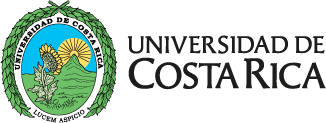


# **Para calentar, crearemos una matriz random de $mxn$ donde el usuario pueda seleccionar el tamaño y el rango de los datos**

In [ ]:
import random
import numpy as np

m = int(input("Ingrese el número de filas: "))
n = int(input("Ingrese el número de columnas: "))
a = int(input("Ingrese el rango mínimo de los datos:"))
b = int(input("Ingrese el rango máximo de los datos:"))

A = np.zeros((n,m))
for i in range(n):
  for j in range(m):
    A[i][j]=random.randint(a,b)
print(A)

Ingrese el número de filas: 10
Ingrese el número de columnas: 10
Ingrese el rango mínimo de los datos:0
Ingrese el rango máximo de los datos:1
[[1. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [1. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 1. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 1. 1. 0. 1. 0. 1. 1. 1.]
 [0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1. 1. 1. 0. 1.]]


**Ahora, crearemos una matriz de tamaño NxN, cuyos elementos son números random independientes con una distribución Gaussiana de media 0 y desviación estándar σ
= 1**

In [ ]:
import numpy as np

N = int(input("Ingrese el tamaño N de la matriz: "))

# Generar la matriz
matrix = np.random.normal(loc=0, scale=1, size=(N, N))

# Imprimir la matriz con el tamaño indicado
print(f"La matriz generada de tamaño N = {N} es:")
print(matrix)

Ingrese el tamaño N de la matriz: 4
La matriz generada de tamaño N = 4 es:
[[-0.69151514  0.59635034 -0.42490688 -0.49387109]
 [ 0.07293908  0.49015406 -0.19679507 -0.460828  ]
 [ 0.94198206  0.15470694  0.22930058 -0.62620014]
 [-0.06971512  1.95441858 -1.51970998  0.19714683]]


Explicación:

* loc=0: especifica la media (𝜇) de la distribución gaussiana.
* scale=1: especifica la desviación estándar (𝜎)
* size=(N, N): especifica la forma de la matriz como
𝑁
×
𝑁.



**Para simetrizar una matriz
$$𝐴$$ Simplemente sumamos la matriz
$$𝐴$$ A su traspuesta
$$𝐴^𝑇$$
 Esto asegura que la matriz resultante sea simétrica, ya que $$(A + A^T)^T = A^T + A = A + A^T
$$**


In [ ]:
import numpy as np

# Ingresar el tamaño de la matriz
N = int(input("Ingrese el tamaño N de la matriz: "))

# Generar la matriz con números aleatorios de distribución Gaussiana
matrix = np.random.normal(loc=0, scale=1, size=(N, N))

# Simetrizar la matriz sumándola con su traspuesta
symmetric_matrix = matrix + matrix.T

# Imprimir la matriz original y la simetrizada
print(f"Matriz generada (original):\n{matrix}")
print(f"\nMatriz simetrizada (A + A^T):\n{symmetric_matrix}")

Ingrese el tamaño N de la matriz: 4
Matriz generada (original):
[[ 2.07866158  0.33305749  1.21147364 -1.42876631]
 [-0.0233859   0.57545659 -0.03823594  0.29231098]
 [-0.71557452 -0.92317343 -0.03744996 -1.42963744]
 [ 1.19911172 -1.07793967 -0.02939599  1.1810462 ]]

Matriz simetrizada (A + A^T):
[[ 4.15732316  0.30967159  0.49589911 -0.22965459]
 [ 0.30967159  1.15091317 -0.96140937 -0.78562869]
 [ 0.49589911 -0.96140937 -0.07489992 -1.45903343]
 [-0.22965459 -0.78562869 -1.45903343  2.36209241]]


**(a) Tenemos que generar un conjunto con M = 1000 o más matrices GOE (en inglés, Gaussian Orthogonal Ensemble) de tamaño N = 2, 4 y 10, además encontrar los valores propios λn de cada matriz,
ordenados en orden creciente. También tenemos que encontrar la diferencia
entre los valores propios vecinos λn+1 − λn, para
n, digamos, igual a N/2.**

In [ ]:
import numpy as np

# Función para generar una matriz GOE de tamaño N
def generate_goe_matrix(N):
    # Generar una matriz aleatoria de tamaño NxN con elementos distribuidos de forma Gaussiana
    matrix = np.random.normal(loc=0, scale=1, size=(N, N))
    # Hacer la matriz simétrica
    return (matrix + matrix.T) / 2

# Parámetros
M = 1000  # Número de matrices en la colección
sizes = [2, 4, 10]  # Diferentes tamaños de matriz para analizar

# Iterar sobre cada tamaño de matriz
for N in sizes:
    eigenvalue_differences = []  # Para almacenar las diferencias de autovalores de cada matriz
    print(f"Procesando matrices GOE de tamaño N = {N} con tamaño de colección M = {M}")

    for _ in range(M):
        # Generar una matriz GOE
        goe_matrix = generate_goe_matrix(N)
        # Calcular los autovalores
        eigenvalues = np.linalg.eigvalsh(goe_matrix)  # Los autovalores se ordenan automáticamente en orden ascendente
        # Calcular la diferencia entre los autovalores vecinos alrededor de n = N/2
        mid_index = N // 2  # Índice medio
        diff = eigenvalues[mid_index] - eigenvalues[mid_index - 1]
        eigenvalue_differences.append(diff)

    # Mostrar los resultados
    print(f"Diferencia promedio de autovalores para N = {N}: {np.mean(eigenvalue_differences)}")
    print(f"Desviación estándar de las diferencias para N = {N}: {np.std(eigenvalue_differences)}")
    print()

Procesando matrices GOE de tamaño N = 2 con tamaño de colección M = 1000
Diferencia promedio de autovalores para N = 2: 1.789009965712039
Desviación estándar de las diferencias para N = 2: 0.906842934932573

Procesando matrices GOE de tamaño N = 4 con tamaño de colección M = 1000
Diferencia promedio de autovalores para N = 4: 1.1674191369182227
Desviación estándar de las diferencias para N = 4: 0.6384643155457359

Procesando matrices GOE de tamaño N = 10 con tamaño de colección M = 1000
Diferencia promedio de autovalores para N = 10: 0.7136239470140451
Desviación estándar de las diferencias para N = 10: 0.3770400202545199



**Para crear el histograma de las diferencias de los autovalores normalizadas por la media, vamos a realizar los siguientes pasos:**

1.   Calcular la diferencia entre los autovalores de cada matriz GOE, como se hizo antes.
2. Normalizar las diferencias de los autovalores dividiéndolas por la media de las diferencias para cada tamaño de matriz
𝑁.
3. Graficar un histograma de las diferencias normalizadas, con un tamaño de bin pequeño para observar las fluctuaciones.
4. Estudiar de la repulsión de niveles.




**Paso 1: Calcular y normalizar las diferencias**

Procesando matrices GOE de tamaño N = 2 con tamaño de colección M = 10
Procesando matrices GOE de tamaño N = 4 con tamaño de colección M = 10
Procesando matrices GOE de tamaño N = 10 con tamaño de colección M = 10


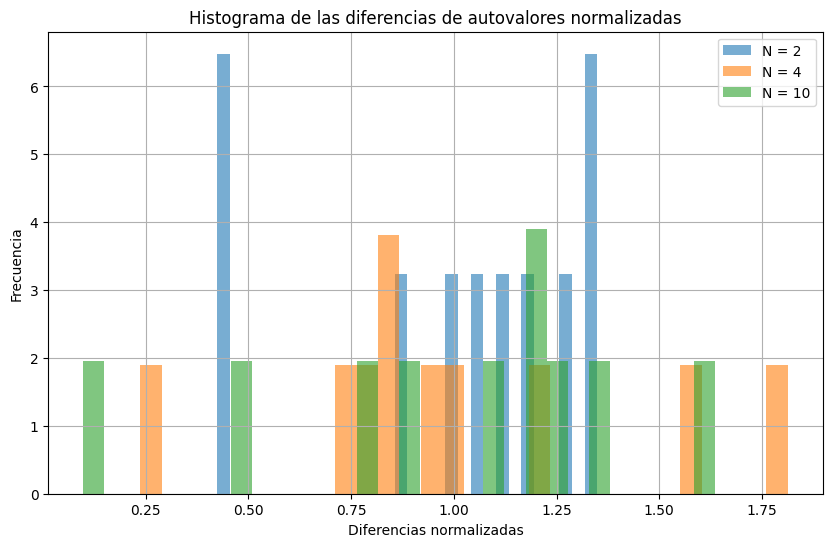

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para generar una matriz GOE de tamaño N
def generate_goe_matrix(N):
    # Generar una matriz aleatoria de tamaño NxN con elementos distribuidos de forma Gaussiana
    matrix = np.random.normal(loc=0, scale=1, size=(N, N))
    # Hacer la matriz simétrica
    return (matrix + matrix.T) / 2

# Parámetros
M = 10  # Número de matrices en la colección (puedes cambiar a 1000 para obtener resultados más precisos)
sizes = [2, 4, 10]  # Diferentes tamaños de matriz para analizar

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Iterar sobre cada tamaño de matriz
for N in sizes:
    eigenvalue_differences = []  # Para almacenar las diferencias de autovalores de cada matriz
    print(f"Procesando matrices GOE de tamaño N = {N} con tamaño de colección M = {M}")

    for _ in range(M):
        # Generar una matriz GOE
        goe_matrix = generate_goe_matrix(N)
        # Calcular los autovalores
        eigenvalues = np.linalg.eigvalsh(goe_matrix)  # Los autovalores se ordenan automáticamente en orden ascendente
        # Calcular la diferencia entre los autovalores vecinos alrededor de n = N/2
        mid_index = N // 2  # Índice medio
        diff = eigenvalues[mid_index] - eigenvalues[mid_index - 1]
        eigenvalue_differences.append(diff)

    # Normalizar las diferencias de autovalores dividiendo por la media
    mean_diff = np.mean(eigenvalue_differences)
    normalized_differences = np.array(eigenvalue_differences) / mean_diff

    # Graficar el histograma de las diferencias normalizadas
    plt.hist(normalized_differences, bins=30, alpha=0.6, label=f"N = {N}", density=True)

# Personalizar el gráfico
plt.title('Histograma de las diferencias de autovalores normalizadas')
plt.xlabel('Diferencias normalizadas')
plt.ylabel('Frecuencia')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Explicación del código:
1. Generación de matrices GOE:

* Como antes, generamos las matrices con la función generate_goe_matrix(N).
2. Cálculo de las diferencias entre autovalores:
* Calculamos las diferencias de los autovalores cercanos al centro de la matriz,
𝑛
=
𝑁
/
2
n=N/2, y las almacenamos.
3. Normalización:

* Normalizamos las diferencias dividiendo cada una por la media de las diferencias en esa colección de matrices.
4. Histograma:

* Usamos plt.hist() para graficar un histograma de las diferencias normalizadas. El parámetro bins=30 asegura que se vea con suficiente resolución.

**Para M=1000**

Procesando matrices GOE de tamaño N = 2 con tamaño de colección M = 1000
Procesando matrices GOE de tamaño N = 4 con tamaño de colección M = 1000
Procesando matrices GOE de tamaño N = 10 con tamaño de colección M = 1000


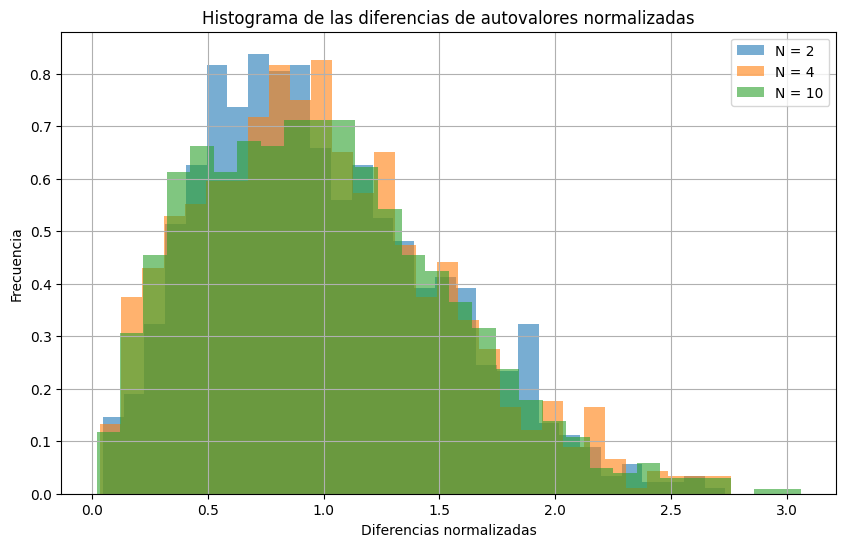

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para generar una matriz GOE de tamaño N
def generate_goe_matrix(N):
    # Generar una matriz aleatoria de tamaño NxN con elementos distribuidos de forma Gaussiana
    matrix = np.random.normal(loc=0, scale=1, size=(N, N))
    # Hacer la matriz simétrica
    return (matrix + matrix.T) / 2

# Parámetros
M = 1000  # Número de matrices en la colección (puedes cambiar a 1000 para obtener resultados más precisos)
sizes = [2, 4, 10]  # Diferentes tamaños de matriz para analizar

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Iterar sobre cada tamaño de matriz
for N in sizes:
    eigenvalue_differences = []  # Para almacenar las diferencias de autovalores de cada matriz
    print(f"Procesando matrices GOE de tamaño N = {N} con tamaño de colección M = {M}")

    for _ in range(M):
        # Generar una matriz GOE
        goe_matrix = generate_goe_matrix(N)
        # Calcular los autovalores
        eigenvalues = np.linalg.eigvalsh(goe_matrix)  # Los autovalores se ordenan automáticamente en orden ascendente
        # Calcular la diferencia entre los autovalores vecinos alrededor de n = N/2
        mid_index = N // 2  # Índice medio
        diff = eigenvalues[mid_index] - eigenvalues[mid_index - 1]
        eigenvalue_differences.append(diff)

    # Normalizar las diferencias de autovalores dividiendo por la media
    mean_diff = np.mean(eigenvalue_differences)
    normalized_differences = np.array(eigenvalue_differences) / mean_diff

    # Graficar el histograma de las diferencias normalizadas
    plt.hist(normalized_differences, bins=30, alpha=0.6, label=f"N = {N}", density=True)

# Personalizar el gráfico
plt.title('Histograma de las diferencias de autovalores normalizadas')
plt.xlabel('Diferencias normalizadas')
plt.ylabel('Frecuencia')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Histograma de las diferencias de autovalores normalizadas

En el histograma de las diferencias de los autovalores normalizadas, esperamos observar un "vacío" en las frecuencias cercanas a cero. Este vacío es causado por la **repulsión de niveles**, que es un fenómeno estadístico en el que los autovalores de las matrices GOE tienden a evitar estar demasiado cerca unos de otros.


Cuando se tiene una matriz GOE de tamaño N=2, la matriz tiene la siguiente forma:

 $
M = \begin{pmatrix}
a & b \\
b & c
\end{pmatrix}
$
Los autovalores de esta matriz se obtienen resolviendo la ecuación característica de la matriz. La ecuación característica es:

$det
(
𝑀
−
𝜆
𝐼
)
=
0$

# Cálculo de la diferencia de autovalores para \( N = 2 \)

La diferencia de los autovalores de la matriz GOE \( M \) de tamaño \( N = 2 \) es:

$$
\Delta \lambda = \sqrt{(a-c)^2 + 4b^2}
$$

Donde $a$, $b$ y $c$ son números aleatorios generados según una distribución normal estándar.

En este caso, los elementos
𝑎,
𝑏, y
𝑐 se generan aleatoriamente siguiendo una distribución normal estándar
$𝑁$
(
0
,
1
). A medida que se calculan las diferencias
Δ
𝜆
Δλ, notamos que las diferencias entre los autovalores rara vez se acercan a cero. Esto se debe a la repulsión de niveles que impide que los autovalores se acerquen mucho entre sí.


# Depuración con \( M = 10 \) y \( M = 1000 \)

Es recomendable comenzar con \( M = 10 \) para depurar, y luego aumentar \( M \) a 1000 para obtener una distribución más precisa y observar con mayor claridad la repulsión de niveles.

- **Con \( M = 10 \)**: Los resultados pueden ser ruidosos y mostrar fluctuaciones debido al tamaño pequeño de la muestra.
- **Con \( M = 1000 \)**: Las fluctuaciones disminuirán y la repulsión de niveles será más clara, permitiendo una mejor visualización de la distribución de las diferencias de los autovalores.


**Para M=1000, con matrices de tamaños N = 30, 60, 90**

Procesando matrices GOE de tamaño N = 30 con tamaño de colección M = 1000
Procesando matrices GOE de tamaño N = 60 con tamaño de colección M = 1000
Procesando matrices GOE de tamaño N = 90 con tamaño de colección M = 1000


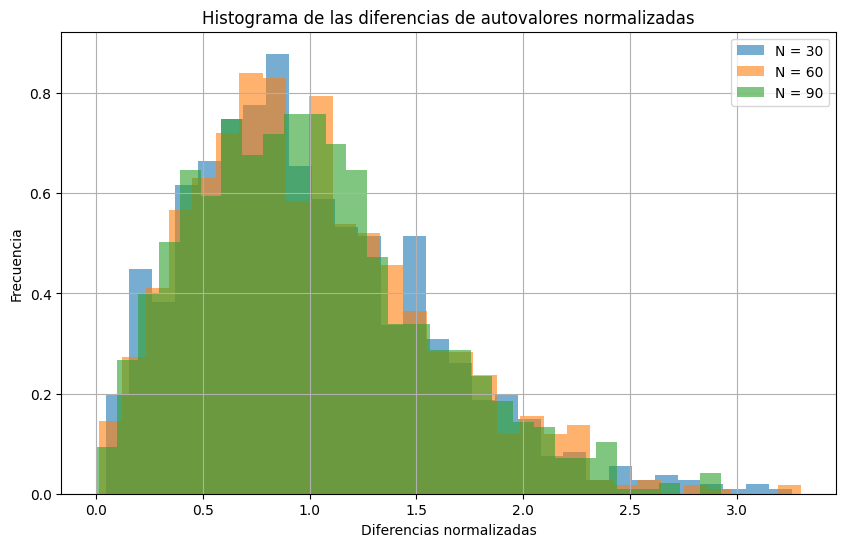

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para generar una matriz GOE de tamaño N
def generate_goe_matrix(N):
    # Generar una matriz aleatoria de tamaño NxN con elementos distribuidos de forma Gaussiana
    matrix = np.random.normal(loc=0, scale=1, size=(N, N))
    # Hacer la matriz simétrica
    return (matrix + matrix.T) / 2

# Parámetros
M = 1000  # Número de matrices en la colección (puedes cambiar a 1000 para obtener resultados más precisos)
sizes = [30, 60, 90]  # Diferentes tamaños de matriz para analizar

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Iterar sobre cada tamaño de matriz
for N in sizes:
    eigenvalue_differences = []  # Para almacenar las diferencias de autovalores de cada matriz
    print(f"Procesando matrices GOE de tamaño N = {N} con tamaño de colección M = {M}")

    for _ in range(M):
        # Generar una matriz GOE
        goe_matrix = generate_goe_matrix(N)
        # Calcular los autovalores
        eigenvalues = np.linalg.eigvalsh(goe_matrix)  # Los autovalores se ordenan automáticamente en orden ascendente
        # Calcular la diferencia entre los autovalores vecinos alrededor de n = N/2
        mid_index = N // 2  # Índice medio
        diff = eigenvalues[mid_index] - eigenvalues[mid_index - 1]
        eigenvalue_differences.append(diff)

    # Normalizar las diferencias de autovalores dividiendo por la media
    mean_diff = np.mean(eigenvalue_differences)
    normalized_differences = np.array(eigenvalue_differences) / mean_diff

    # Graficar el histograma de las diferencias normalizadas
    plt.hist(normalized_differences, bins=30, alpha=0.6, label=f"N = {N}", density=True)

# Personalizar el gráfico
plt.title('Histograma de las diferencias de autovalores normalizadas')
plt.xlabel('Diferencias normalizadas')
plt.ylabel('Frecuencia')
plt.legend(loc='best')
plt.grid(True)
plt.show()


**(b) Tenemos que demostrar que la diferencia de valores propios para $M$ es
$λ = p(c − a)2 + 4b2 = 2√d2 + b2$ donde $d =
(c−a)/2$, y la traza $c+a$ es irrelevante. Ignorando
la traza, la distribución de probabilidad de matrices
se puede escribir como $ρM(d, b)$. ¿Cuál es la región en el plano
$(b, d)$ que corresponde al rango de desdoblamientos de valores propios $(λ, λ + Δ)$? Si $ρM$ es continua
y finita en $d = b = 0$, argumente que la densidad de probabilidad $ρ(λ)$ de encontrar un desdoblamiento de valores propios
cerca de $λ = 0$ se anula (repulsión de nivel). (Pista:
tanto $d$ como $b$ deben anularse para que $λ = 0$. Vaya a
coordenadas polares, con $λ$ como radio).**

**1. Mostrar la relación de 𝜆 en términos de
𝑑 y
𝑏**


Consideramos la matriz
 $
M = \begin{pmatrix}
a & b \\
b & c
\end{pmatrix}
$ de tamaño
2
×
2 generada por una distribución GOE, y calculamos su diferencia de autovalores.

La ecuación de los autovalores fue obtenida previamente, y podemos reescribir la diferencia
𝜆 entre los autovalores como:



$𝜆
=
√ (
𝑎
−
𝑐
)^
2
+
4
𝑏^
2$


Ahora, introducimos la variable
𝑑 definida como:

$𝑑
=
(𝑐
−
𝑎)/
2$

Entonces,
𝑐
−
𝑎
=
2
𝑑, y podemos sustituir esta expresión en la ecuación de
𝜆:

$𝜆
=
√(
2
𝑑
)^
2
+
4
𝑏^
2$

Simplificando:

$𝜆
=
√4
𝑑^2
+
4
𝑏^2$
=
$2
√𝑑
^2
+
𝑏^
2$

Por lo tanto, hemos demostrado que la diferencia de autovalores
𝜆 se puede escribir como:

$𝜆
=
2√
𝑑
^2
+
𝑏^
2$

**2. La distribución de probabilidad
$ρ
_M
(
d
,
b
)$**


El siguiente paso es considerar la distribución de probabilidad de las matrices GOE en el espacio
$(
d
,
b
)$. Como estamos ignorando la traza de la matriz (que es
$c
+
a$, y no afecta a la diferencia de autovalores), la probabilidad de encontrar una matriz con ciertos valores de
$d$ y
$b$ se describe por
$ρ_M
(
d
,
b
)$.

El espacio
$(
d
,
b
)$ está restringido por la condición de que los valores
$d$ y
$b$ deben ser reales y no negativos, ya que
$b$ es el valor de la off-diagonal y
$d$ es la mitad de la diferencia de los elementos diagonales.


**3. El rango de las diferencias de autovalores
$λ$**

El rango de las diferencias de autovalores está determinado por los valores posibles de $λ$. La relación
$λ
=
2√
d
^2
+
b^
2$ implica que:



*   Para
$d
=
0$
 y
$b
=
0$,
$λ
=
0$.
*   Para
$d
→
∞$,
$λ$ aumenta sin límite
* Para
$b
→
∞$,
$λ$ también aumenta sin límite.



Por lo tanto, el rango de las diferencias de autovalores

$λ$ es
$[
0
,
∞
)$, y la región en el plano
$(
b
,
d
)$ correspondiente a un intervalo de diferencias de autovalores
$[
λ
,
λ
+
Δ
]$ está dada por los puntos que cumplen la ecuación:

$$λ
≤
2√
d^
2
+
b^
2
≤
λ
+
Δ$$
​
Este intervalo describe un anillo en el plano
$(
b
,
d
)$ con radio
$λ$ y grosor
$Δ$.

**4. Comportamiento de
$ρ_
M​$
  cerca de
$λ
=
0$**



Queremos estudiar el comportamiento de la probabilidad de encontrar una diferencia de autovalores cercana a
$λ
=
0$. Como hemos visto, la diferencia de autovalores
$λ$ es
0 solo cuando
$d
=
0$ y
$b
=
0$. Si tomamos las coordenadas
$(
d
,
b
)$ en términos polares, tenemos:

$d
=
r
cos
⁡
(
θ
)$
,
$b
=
r
sin
⁡
(
θ
)$

Donde
$r
= √
d
^2
+
b
^2$
  es la distancia radial desde el origen en el plano
$(
d
,
b
)$, y
$θ$ es el ángulo. La diferencia de autovalores
$λ$ es entonces:

$λ
=
2
r$
Es decir,
$λ$ está relacionado con el radio
$r$ en coordenadas polares. En este sistema de coordenadas, la probabilidad
$ρ_
M
(
d
,
b
)$
 es una función del radio
$r$, y la densidad de probabilidad
$ρ
(
λ
)$ para encontrar una diferencia de autovalores cercana a
$λ
=
0$ es:

$$ρ
(
λ
)
=
ρ_M
(
d
,
b
)
∣
d
(
d
,
b
)/
d
λ
∣$$


Dado que
$λ
=
2
r$, tenemos
$r
=
λ/
2$. Por lo tanto, la probabilidad de encontrar
$λ$ cerca de 0 es proporcional a:

$ρ
(
λ
)
∼
λ$
Sin embargo, esto implica que la probabilidad de encontrar una diferencia de autovalores cerca de
$λ
=
0$ tiende a desaparecer a medida que
$λ
→
0$, ya que
$ρ
(
λ
)
→
0$ cuando
$λ
→
0$.


**Conclusión: Repulsión de Niveles**

Este comportamiento es una manifestación del fenómeno de la repulsión de niveles: la probabilidad de que dos autovalores estén extremadamente cercanos es cero. La función de densidad
$ρ
(
λ
)$ para la diferencia de autovalores tiende a 0 cuando
$λ
→
0$, lo que significa que los autovalores de las matrices GOE tienden a evitar valores cercanos entre sí, especialmente cerca de
$λ
=
0$.


